In [1]:
# 📌 Cell 1: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [2]:
# 📌 Cell 2: Download Data
tickers = ["NVDA", "AMD", "TSM", "AVGO", "QCOM"]

data = yf.download(tickers, start="2022-01-01", end="2025-01-01")["Close"]

# แสดงข้อมูล 5 แถวแรก
data.head()

C:\Users\keeta\AppData\Local\Temp\ipykernel_5364\3889087200.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2022-01-01", end="2025-01-01")["Close"]
[*********************100%***********************]  5 of 5 completed


Ticker,AMD,AVGO,NVDA,QCOM,TSM
Date,,,,,
2022-01-03,150.240005,61.667755,30.064438,171.149078,121.032455
2022-01-04,144.419998,62.374332,29.234999,172.086563,125.355049
2022-01-05,136.149994,59.778645,27.552166,171.415588,119.397392
2022-01-06,136.229996,59.223621,28.125086,170.910065,120.722359
2022-01-07,132.000000,57.561359,27.195835,165.818192,116.052078


In [3]:
# 📌 Cell 3: Basic Info
print("Shape:", data.shape)
print("\nข้อมูลหาย (missing values):")
print(data.isnull().sum())

print("\nสถิติพื้นฐาน:")
display(data.describe())

Shape: (753, 5)

ข้อมูลหาย (missing values):
Ticker
AMD     0
AVGO    0
NVDA    0
QCOM    0
TSM     0
dtype: int64

สถิติพื้นฐาน:


Ticker,AMD,AVGO,NVDA,QCOM,TSM
count,753.000000,753.000000,753.000000,753.000000,753.000000
mean,117.266388,92.707051,54.384845,136.538737,111.566994
std,34.799610,46.420050,42.168678,27.244955,38.243705
min,55.939999,40.644676,11.213528,96.921852,57.541286
25%,89.849998,54.187054,19.558542,113.523666,84.583580
50%,111.750000,81.141922,41.886314,129.674835,95.838829
75%,146.070007,129.144516,87.717140,158.825836,136.612274
max,211.380005,247.996048,148.837341,220.949265,205.802704


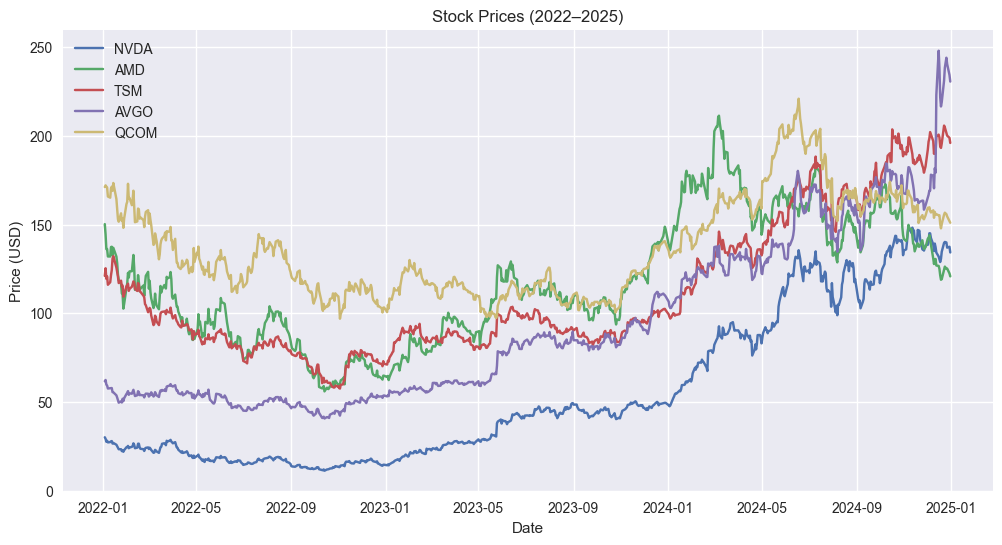

In [4]:
# 📌 Cell 4: Plot ราคาหุ้นจริง
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title("Stock Prices (2022–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

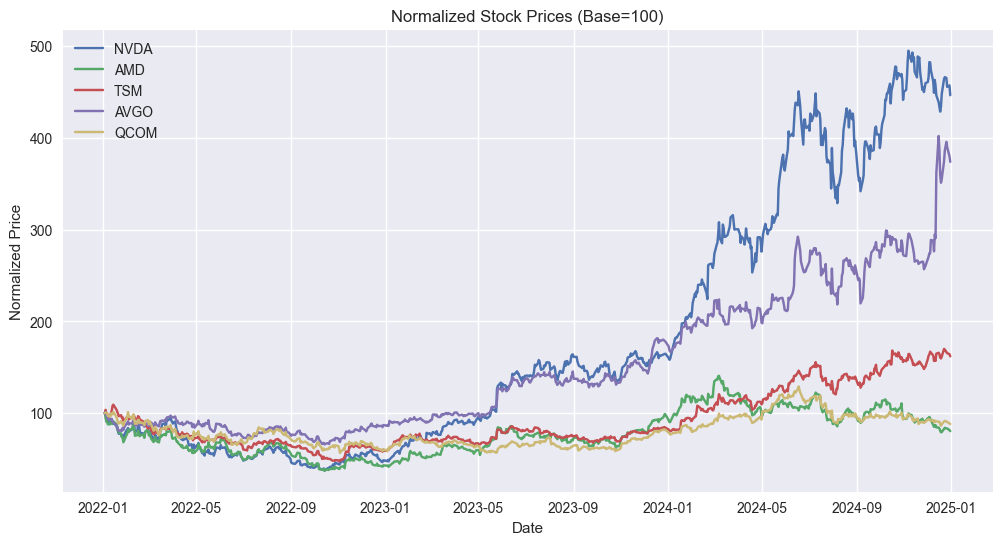

In [5]:
# 📌 Cell 5: Plot ราคาหุ้นแบบ Normalized (เริ่มต้นที่ 100)
normalized = data / data.iloc[0] * 100

plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(normalized.index, normalized[ticker], label=ticker)
plt.title("Normalized Stock Prices (Base=100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

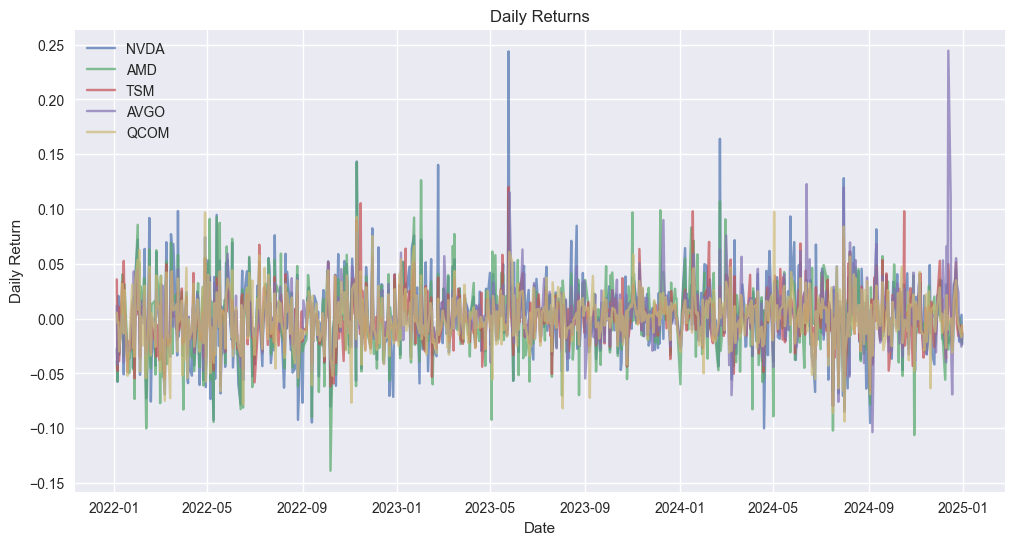

In [6]:
# 📌 Cell 6: Daily Returns
returns = data.pct_change().dropna()

plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(returns.index, returns[ticker], label=ticker, alpha=0.7)
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()

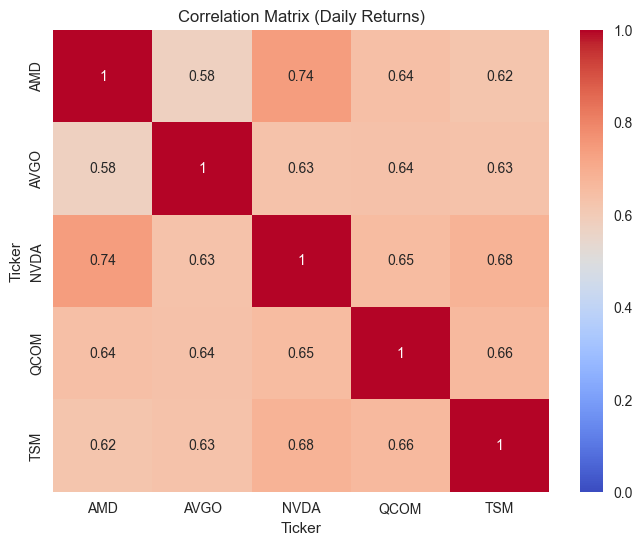

In [7]:
# 📌 Cell 7: Correlation Matrix (Returns)
corr = returns.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Correlation Matrix (Daily Returns)")
plt.show()

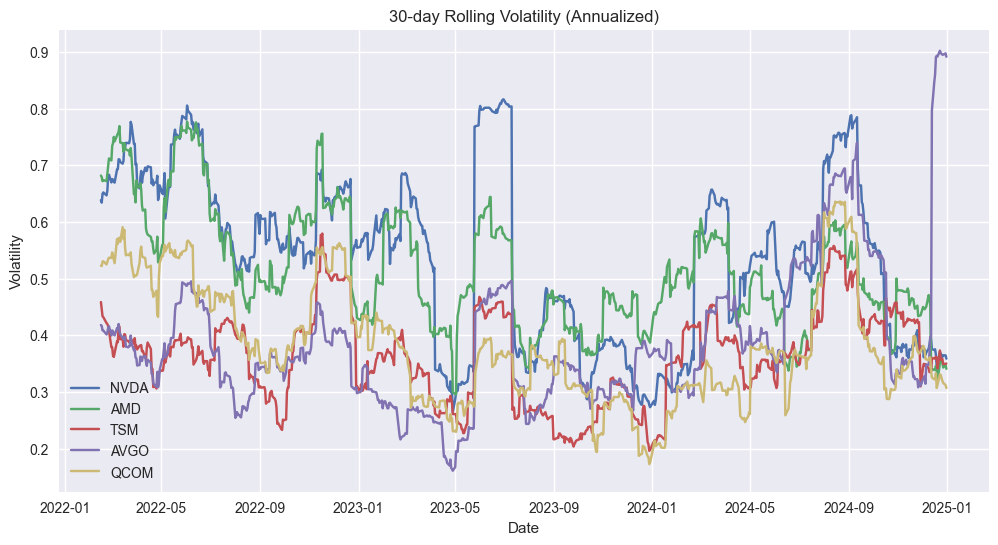

In [8]:
# 📌 Cell 8: Rolling Volatility (ความผันผวน 30 วัน)
rolling_vol = returns.rolling(window=30).std() * np.sqrt(252)  # annualized

plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(rolling_vol.index, rolling_vol[ticker], label=ticker)
plt.title("30-day Rolling Volatility (Annualized)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

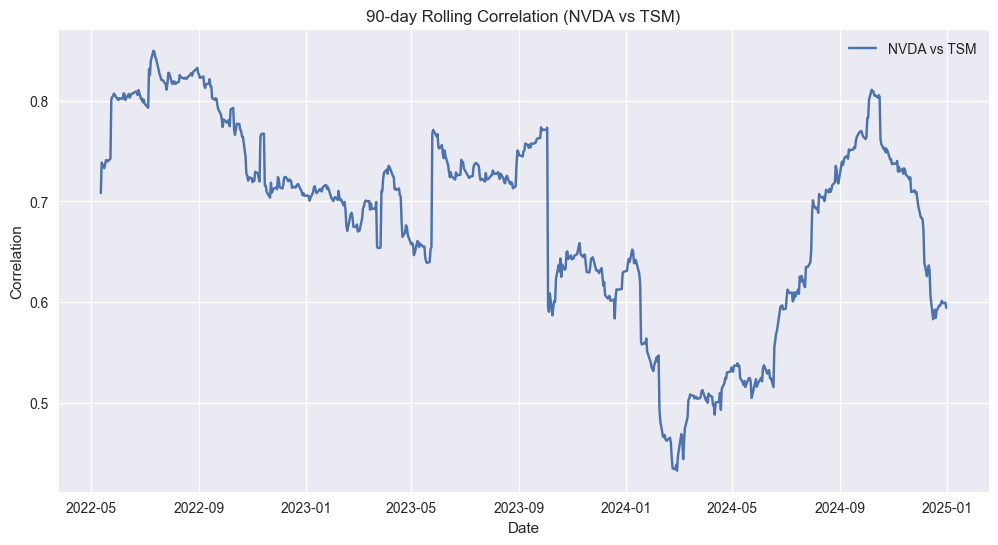

In [9]:
# 📌 Cell 9: Rolling Correlation Example (NVDA vs TSM)
rolling_corr = returns["NVDA"].rolling(window=90).corr(returns["TSM"])

plt.figure(figsize=(12,6))
plt.plot(rolling_corr.index, rolling_corr, label="NVDA vs TSM")
plt.title("90-day Rolling Correlation (NVDA vs TSM)")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True)
plt.show()